### Women's E-Commerce Clothing Reviews

In [162]:
## Calling libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk import word_tokenize,pos_tag
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
from plotly import tools
init_notebook_mode(connected=True)
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer as TV
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report,cohen_kappa_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\Yachna
[nltk_data]     Hasija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
## Reading Dataset
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [164]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [165]:
## Dropping columns:- Unnamed: 0, Clothing ID, Title
df.drop(['Unnamed: 0','Title','Clothing ID'],axis=1,inplace=True)

In [166]:
## Shape of the data
df.shape

(23486, 8)

In [167]:
## Dropping the records where review text is null
df = df[~df['Review Text'].isnull()]

In [168]:
## Checking missing values in the dataset
df.isnull().sum()

Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [169]:
## Filling missing values in Division Name, Department Name and Class Name using their respective mode.

In [170]:
def fillna(df,col):
    return df[col].fillna(df[col].mode()[0],inplace=True)

In [171]:
missing_cols=["Division Name","Department Name","Class Name"]

In [172]:
for i in missing_cols:
    fillna(df,i)

In [173]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [174]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
## Creating new columns:- 
## 1. Sentiment (Polarity) using TextBlob- Polarity of Review Text where Polarity>0 indicates Positive Sentiment, 
## Polarity=0 indicates Neutral Sentiment and Polarity<0 indicates Negative Sentiment. 
## 2. Review Length - Length of reviews in Review Text
## 3. Word Count - Total number of words in Review Text

df['Polarity']=df['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['review_len']=df['Review Text'].apply(lambda x:len(x))
df['token_count']=df['Review Text'].apply(lambda x:len(str(x).split(' ')))

In [176]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,review_len,token_count
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,53,8
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,303,67
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,500,98
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,124,22
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36


In [177]:
## 5 Random reviews with highest polarity

print("5 Random reviews with highest polarity i.e. 1 \n")
cl=df.loc[df['Polarity']==1,['Review Text']].sample(5).values
for c in cl:
    print(c[0])

5 Random reviews with highest polarity i.e. 1 

Fits perfect!
Perfect for lunch with the girls, pta, or saturdays with the family. this skirt is a perfect addition to your fall wardrobe.
Great dress for vacations!
Bought this tank on a whim, but i'm so happy i did! so flattering, comfy and well made.
This is the perfect holiday dress. my best purchase of the season!


In [178]:
# 2 reviews with most negative polarity
print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.Polarity == -0.97500000000000009, ['Review Text']].sample(2).values
for c in cl:
    print(c[0])


2 reviews with the most negative polarity: 

Cut out design, no seems or hems.
 very disappointed in retailer
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse


## Visualization with matplotlib

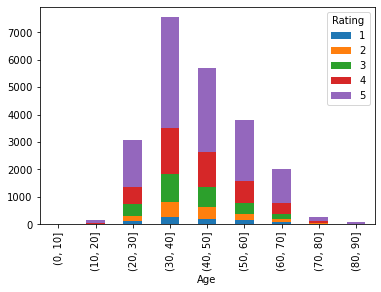

In [179]:
## Distribution of Rating vs Age Groups
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar',stacked=True)
plt.show()

In [180]:
## Inference:-

## From this barplot, we can conclude that People having age in the range of (30,40) have given maximum rating of 5 and 
## people in the age group of (10,20) dont care about reviews and ratings, similarly, the age group above 70 did not care 
## about the shopping stuff.

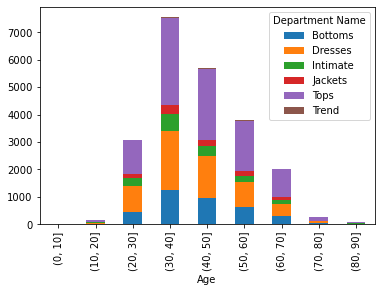

In [181]:
## Distribution of Department Name vs Age

df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar',stacked=True)
plt.show()

In [182]:
## Inference:-
## From this barplot we can conclude that females were more focussed on Tops and Dresses department and least focussed on 
## Trend Department.

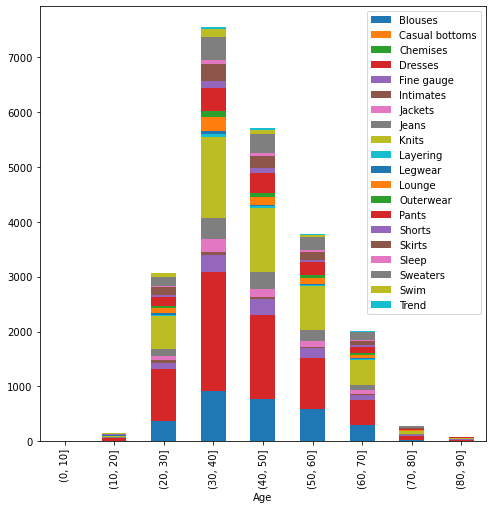

In [183]:
## Distribution of Class Name vs Age 

df.groupby(['Class Name', pd.cut(df['Age'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.legend(loc="upper right")
plt.show()

## Visualization with Plotly

In [194]:
## Polarity Distribution

df['Polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [160]:
## Inference:-
## Thus from this polarity distribution, we can visualize that most of the reviews are positive as polarity score>0
## for most of the reviews.

In [187]:
## Percentage of positive, negative and neutral reviews.

def polarity(df):
    if df['Polarity'] > 0:
        val = "Positive Review"
    elif df['Polarity'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df['Sentiment_Type'] = df.apply(polarity, axis=1)
# fig.show("png")

In [188]:
df['Sentiment_Type'].value_counts().values

array([21227,  1322,    92], dtype=int64)

In [193]:
px.pie(df,names=df['Sentiment_Type'].value_counts().index,labels=df['Sentiment_Type'].value_counts().index,
       values=df['Sentiment_Type'].value_counts().values,
       title='Pie chart showing percentage of positive, negative and neutral reviews')

<IPython.core.display.Javascript object>

In [28]:
## Inference:-
## From Pie Chart, we can conclude that in this dataset, maximum reviews are positive i.e. 93.8%.

In [29]:
## Rating Distribution

df['Rating'].iplot(kind='hist',xTitle='Rating',yTitle='count',title='Review Rating Distribution',linecolor='black',colors='red')

In [30]:
## Inference:-
## Thus, from review rating distribution we can see that most of the ratings given are 4 or 5, and hence aligned with 
## the polarity score.

In [31]:
## Age Distribution

df['Age'].iplot(kind='hist',xTitle='Age',yTitle='count',title='Age distribution',linecolor='black',colors='blue',bins=50)

In [32]:
## Inference:-
## Thus, from age distribution we can see that most reviewers have age in the range of 30 and 40s.

In [33]:
## Review Length Distribution

df['review_len'].iplot(kind='hist',xTitle='Review Length',yTitle='count',title='Review length distribution',linecolor='black',color='pink')

In [34]:
## Inference:-
## Thus, from Review Length distribution we can conclude that Lot of people gave long reviews of length 500 as it is 
## right skewed.

In [35]:
## Word Count Distribution

df['token_count'].iplot(kind='hist',xTitle='token count',yTitle='count',title='Word count distribution',linecolor='black',
                       color='red',opacity=1)

In [36]:
## Inference:-
## Thus, from Word Count distribution we can conclude that people like to write long reviews having maxium token_count of 
## 100 words.

In [37]:
# Categorical variables visualization

In [38]:
## Division Name Distribution

df['Division Name'].value_counts().iplot(kind='bar',yTitle='count',title='Division Name Distribution',opacity=0.8,color='pink')

In [39]:
## Inference:-
## Thus, from Division Name Distribution we can conclude that General division has the most number of reviews and 
## Intimates have less reviews.

In [40]:
## Department Name Distribution

df['Department Name'].value_counts().iplot(kind='bar',yTitle='count',title='Department Name Distribution',opacity=0.8,
                                          color='purple')

In [41]:
## Inference:-
## Thus, from Department Name Distribution we can conclude that Tops have highest number of reviews and Trend Department 
## have least number of reviews.

In [42]:
## Class Name Distribution

df['Class Name'].value_counts().iplot(kind='bar',yTitle='count',title='Class Name Distribution',opacity=2.5,color='blue')

In [43]:
## Inference:-
## Thus, from Class Name Distribution we can conclude that Dresses have highest name of reviews and Casual bottoms have
## least name of reviews.

In [44]:
## Let's use ngram appraoch for Review Text
## 1. Unigram
## 2. Bigram
## 3. Trigram

In [45]:
## Distribution of unigrams in Review Text before removing stopwords

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText')['count'].sum().sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

In [46]:
## After removing stopwords

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
# print(df2)
# print(df2.groupby('ReviewText')['count'].sum().sort_values(ascending=False))
df2.groupby('ReviewText')['count'].sum().sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words',color='magenta')


In [47]:
## Distribution of Bigrams in Review Text before removing stopwords

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText')['count'].sum().sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words',opacity=1.5)
df3.groupby('ReviewText')['count'].sum().sort_values(ascending=False)


ReviewText
in the        7169
it is         6169
and the       5614
this dress    4758
on the        4338
of the        3932
and it        3725
it was        3100
this top      2939
this is       2750
the fabric    2655
love the      2641
love this     2333
is very       2321
to wear       2267
but it        2196
the dress     2180
with the      2057
for me        2026
but the       1974
Name: count, dtype: int64

In [48]:
## After removing stopwords

def top_n_bigrams(corpus,n=None):
    vectorizer=CountVectorizer(ngram_range=(2,2),stop_words='english')
    bag_of_words=vectorizer.fit_transform(corpus)
    sum_of_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_of_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
    return words_freq[:n]
common_words=top_n_bigrams(df['Review Text'],20)
df4=pd.DataFrame(common_words,columns=['ReviewText','Count'])
df4.groupby('ReviewText')['Count'].sum().sort_values(ascending=False).iplot(kind='bar',xTitle='ReviewText',yTitle='Count',
                                                                            linecolor='black', title='Top 20 bigrams in review after removing stop words',
                                                                             opacity=1,colors='purple')               

In [49]:
## Distribution of trigrams in Review Text

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words',
    colors='violet',opacity=2.5)

In [50]:
## After removing stopwords

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df6.groupby('ReviewText')['count'].sum().sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words',colors='red')

In [51]:
## POS-Part Of Speech tagging is a process of assigning tags such as Nouns, Adjectives, Adverbs, Prepositions etc to each
## word.

In [52]:
## Let's use textblob to assign these phrases to Review Text feature.

In [53]:
blob=TextBlob(str(df['Review Text'])).tags

In [54]:
pos_df=pd.DataFrame(blob,columns=['words','pos'])

In [55]:
pos_df

,words,pos
0,0,CD
1,Absolutely,RB
2,wonderful,JJ
3,silky,NN
4,and,CC
...,...,...
106,Text,NNP
107,Length,NNP
108,22641,CD
109,dtype,NN


In [211]:
go.FigureWidget()

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

In [221]:
pos_df.pos.value_counts().values

array([25, 15, 12, 11,  8,  6,  5,  5,  4,  4,  4,  4,  3,  2,  2,  1],
      dtype=int64)

In [223]:
import ipywidgets

In [240]:
## Visualization of pos. count in Review Text.

# fig=pos_df.pos.value_counts().iplot(kind='bar',xTitle='POS',yTitle='count',
#                                 title='Top 20 Part-of-speech tagging for review corpus',color='green')
data = [go.Bar(x=pos_df.pos.value_counts().index, y=pos_df.pos.value_counts().values)]
layout = go.Layout(
    bargap=0.1,
    xaxis=go.layout.XAxis(title="POS"),
    yaxis=go.layout.YAxis(title="COUNT"),
    template="ggplot2",
    title="Top 20 Part-of-speech tagging for review corpus",
    hovermode="y",
    margin=dict(l=100, t=35)
)
iplot(go.Figure(data, layout))

c = ipywidgets.Checkbox(value=False)
display(c)

Checkbox(value=False)

In [57]:
## Inference:-
## From this Distribution we can conclude that NN pos tags are highest in number.

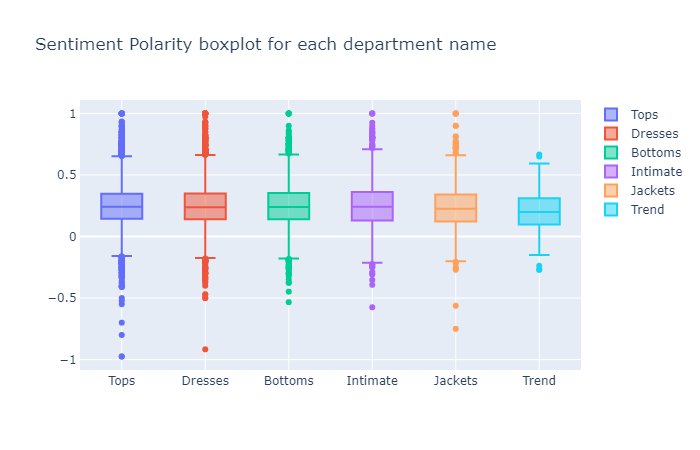

In [202]:
## Let's make boxplot to see the sentiment polarity score for each dept.

tops=df.loc[df['Department Name']=='Tops']['Polarity']
dresses=df.loc[df['Department Name']=='Dresses']['Polarity']
bottoms=df.loc[df['Department Name']=='Bottoms']['Polarity']
intimate=df.loc[df['Department Name']=='Intimate']['Polarity']
jackets=df.loc[df['Department Name']=='Jackets']['Polarity']
trend=df.loc[df['Department Name']=='Trend']['Polarity']
trace0 = go.Box(
    y=tops,
    name = 'Tops')
#     marker = dict(
#         color = 'rgb(214, 12, 140)',
#     )
trace1 = go.Box(
    y=dresses,
    name = 'Dresses'
#     marker = dict(
#         color = 'rgb(0, 128, 128)',
#     )
)
trace2 = go.Box(
    y=bottoms,
    name = 'Bottoms'
#     marker = dict(
#         color = 'rgb(10, 140, 208)',
#     )
)
trace3 = go.Box(
    y=intimate,
    name = 'Intimate'
#     marker = dict(
#         color = 'rgb(12, 102, 14)',
#     )
)
trace4 = go.Box(
    y=jackets,
    name = 'Jackets'
#     marker = dict(
#         color = 'rgb(10, 0, 100)',
#     )
)
trace5 = go.Box(
    y=trend,
    name = 'Trend'
#     marker = dict(
#         color = 'rgb(100, 0, 10)',
#     )
)
    
data=[trace0,trace1,trace2,trace3,trace4,trace5]
layout=go.Layout(title="Sentiment Polarity boxplot for each department name")
fig=go.Figure(data=data,layout=layout)
# iplot(fig,filename="Sentiment Polarity boxplot for each department name")
fig.show('png')

In [59]:
## Inference:-
## From this boxplot we can visualize that all the departments have highest sentiment polarity score as it is greater 
## than 1, except Trend department as reviews for Trend department is also very less.

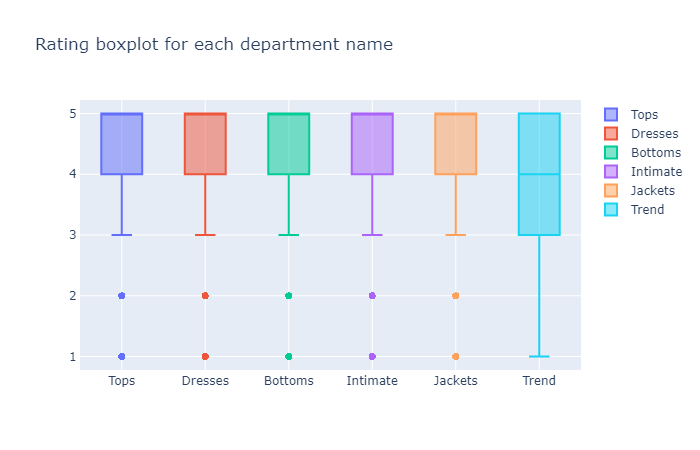

In [200]:
## Let's make boxplot to see the Rating for each dept.

tops=df.loc[df['Department Name']=='Tops']['Rating']
dresses=df.loc[df['Department Name']=='Dresses']['Rating']
bottoms=df.loc[df['Department Name']=='Bottoms']['Rating']
intimate=df.loc[df['Department Name']=='Intimate']['Rating']
jackets=df.loc[df['Department Name']=='Jackets']['Rating']
trend=df.loc[df['Department Name']=='Trend']['Rating']
trace0 = go.Box(
    y=tops,
    name = 'Tops')
#     marker = dict(
#         color = 'rgb(214, 12, 140)',
#     )
trace1 = go.Box(
    y=dresses,
    name = 'Dresses'
#     marker = dict(
#         color = 'rgb(0, 128, 128)',
#     )
)
trace2 = go.Box(
    y=bottoms,
    name = 'Bottoms'
#     marker = dict(
#         color = 'rgb(10, 140, 208)',
#     )
)
trace3 = go.Box(
    y=intimate,
    name = 'Intimate'
#     marker = dict(
#         color = 'rgb(12, 102, 14)',
#     )
)
trace4 = go.Box(
    y=jackets,
    name = 'Jackets'
#     marker = dict(
#         color = 'rgb(10, 0, 100)',
#     )
)
trace5 = go.Box(
    y=trend,
    name = 'Trend'
#     marker = dict(
#         color = 'rgb(100, 0, 10)',
#     )
)
    
data=[trace0,trace1,trace2,trace3,trace4,trace5]
layout=go.Layout(title="Rating boxplot for each department name")
fig=go.Figure(data=data,layout=layout)
# iplot(fig,filename="Rating boxplot for each department name")
fig.show('png')

In [61]:
## Inference:-
## From this boxplot we can visualize that median rating is 5 for all the departments except Trend department.

## So, in this dataset, sentiment polarity is positive and ratings are also very high for most of the reviews.

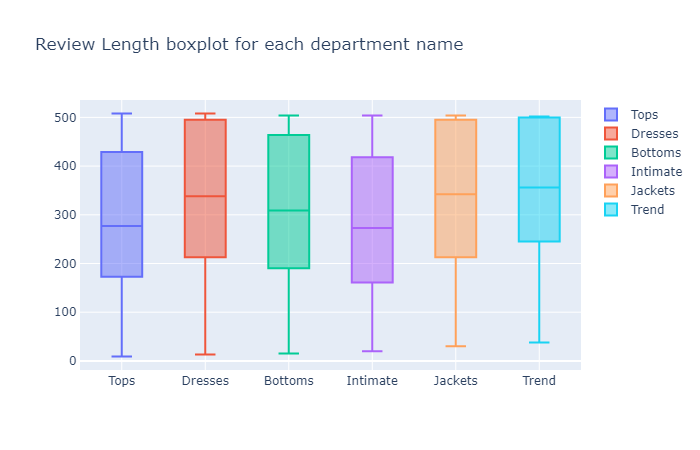

In [199]:
## Let's make boxplot to see the Review Length for each dept.

tops=df.loc[df['Department Name']=='Tops']['review_len']
dresses=df.loc[df['Department Name']=='Dresses']['review_len']
bottoms=df.loc[df['Department Name']=='Bottoms']['review_len']
intimate=df.loc[df['Department Name']=='Intimate']['review_len']
jackets=df.loc[df['Department Name']=='Jackets']['review_len']
trend=df.loc[df['Department Name']=='Trend']['review_len']
trace0 = go.Box(
    y=tops,
    name = 'Tops')
#     marker = dict(
#         color = 'rgb(214, 12, 140)',
#     )
trace1 = go.Box(
    y=dresses,
    name = 'Dresses'
#     marker = dict(
#         color = 'rgb(0, 128, 128)',
#     )
)
trace2 = go.Box(
    y=bottoms,
    name = 'Bottoms'
#     marker = dict(
#         color = 'rgb(10, 140, 208)',
#     )
)
trace3 = go.Box(
    y=intimate,
    name = 'Intimate'
#     marker = dict(
#         color = 'rgb(12, 102, 14)',
#     )
)
trace4 = go.Box(
    y=jackets,
    name = 'Jackets'
#     marker = dict(
#         color = 'rgb(10, 0, 100)',
#     )
)
trace5 = go.Box(
    y=trend,
    name = 'Trend'
#     marker = dict(
#         color = 'rgb(100, 0, 10)',
#     )
)
    
data=[trace0,trace1,trace2,trace3,trace4,trace5]
layout=go.Layout(title="Review Length boxplot for each department name")
fig=go.Figure(data=data,layout=layout)
# iplot(fig,filename="Review Length boxplot for each department name")
fig.show('png')

In [63]:
## Inference:-
## From this boxplot we can visualize that Review length for tops and intimate is relatively lower than other departments.

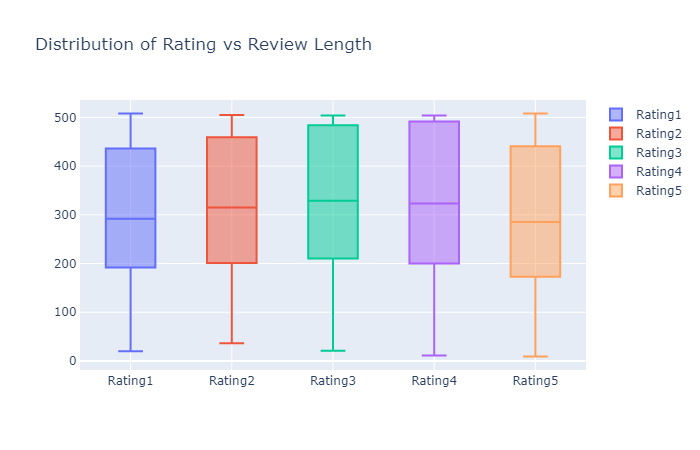

In [198]:
## Let's make boxplot to see the Rating vs Review Length

x1=df[df['Rating']==1]['review_len']
x2=df[df['Rating']==2]['review_len']
x3=df[df['Rating']==3]['review_len']
x4=df[df['Rating']==4]['review_len']
x5=df[df['Rating']==5]['review_len']
trace1=go.Box(y=x1,name='Rating1')
trace2=go.Box(y=x2,name='Rating2')
trace3=go.Box(y=x3,name='Rating3')
trace4=go.Box(y=x4,name='Rating4')
trace5=go.Box(y=x5,name='Rating5')
data=[trace1,trace2,trace3,trace4,trace5]
layout=go.Layout(title='Distribution of Rating vs Review Length')
fig=go.Figure(data=data,layout=layout)
# iplot(fig,filename='Boxplot')
fig.show("png")

In [65]:
## Inference:-
## From this boxplot we can see that Rating 3 and Rating 4 have longest reviews and Rating 5 have shortest review.

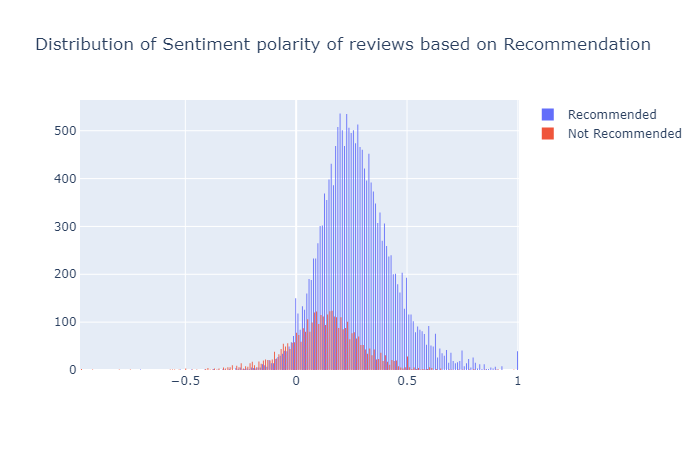

In [197]:
## Let's make boxplot to see the Polarity vs Recommended IND

x1=df.loc[df['Recommended IND']==1,'Polarity'] #---Recommended
x0=df.loc[df['Recommended IND']==0,'Polarity']
trace1=go.Histogram(x=x1,name='Recommended')
trace0=go.Histogram(x=x0,name='Not Recommended')
data=[trace1,trace0]
layout=go.Layout(title='Distribution of Sentiment polarity of reviews based on Recommendation')
fig=go.Figure(data=data,layout=layout)
# iplot(fig,filename='Histogram')
fig.show("png")

In [67]:
## Inference:-
## From this boxplot we can conclude that reviews having high polarity score is most likely to get recommended.

In [68]:
## Let's make boxplot to see the Rating vs Recommended IND

x0=df.loc[df['Recommended IND']==0,'Rating']
x1=df.loc[df['Recommended IND']==1,'Rating']
trace0=go.Histogram(x=x0,name='Not Recommended')
trace1=go.Histogram(x=x1,name='Recommended')
data=[trace0,trace1]
layout=go.Layout(title='Distribution of Rating based on Recommendations')
fig=go.Figure(data=data,layout=layout)
iplot(fig,filename="Histogram")

In [69]:
## Inference:-
## From this histogram we can conclude that recommended reviews have higher rating.

##  MODELING

In [70]:
y =df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

In [71]:
X

,Age,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,review_len,token_count,Sentiment_Type
0,33,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,0.633333,53,8,Positive Review
1,34,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,0.339583,303,67,Positive Review
2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0.073675,500,98,Positive Review
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,0.550000,124,22,Positive Review
4,47,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,0.512891,192,36,Positive Review
...,...,...,...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,0.552667,131,28,Positive Review
23482,48,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,Knits,0.091667,223,37,Positive Review
23483,31,"This fit well, but the top was very see throug...",3,1,General Petite,Dresses,Dresses,0.414286,208,42,Positive Review
23484,28,I bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,0.322222,427,86,Positive Review


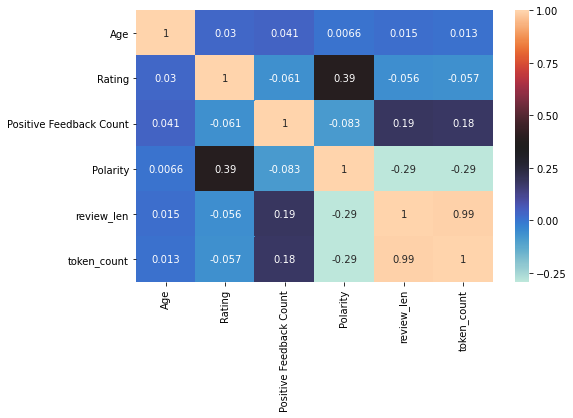

In [72]:
## Let's check multicollinearity using heatmap before applying different algorithms

plt.figure(figsize=(8,5))
import seaborn as sns
sns.heatmap(X.corr(),annot =True, cmap = "icefire")
plt.show()

In [73]:
df.corr()

,Age,Rating,Recommended IND,Positive Feedback Count,Polarity,review_len,token_count
Age,1.000000,0.029962,0.034208,0.040850,0.006649,0.014931,0.012664
Rating,0.029962,1.000000,0.792568,-0.060984,0.386303,-0.056199,-0.057415
Recommended IND,0.034208,0.792568,1.000000,-0.065923,0.320786,-0.031519,-0.029825
Positive Feedback Count,0.040850,-0.060984,-0.065923,1.000000,-0.083379,0.191195,0.184873
Polarity,0.006649,0.386303,0.320786,-0.083379,1.000000,-0.290693,-0.293861
review_len,0.014931,-0.056199,-0.031519,0.191195,-0.290693,1.000000,0.990936
token_count,0.012664,-0.057415,-0.029825,0.184873,-0.293861,0.990936,1.000000


In [74]:
set1 =set()
cor = X.corr()
for i in cor.columns:
#     print(i)
    for j in cor.columns:
#         print(j)
        if cor[i][j]>0.8 and i!=j:
            set1.add(i)
print(set1)

{'review_len', 'token_count'}


In [75]:
## Inference:

## Thus token count and review len are multicollinear and we can drop token count as its correlation with target variable
## is less as compared to correlation of review len with the target variable.

In [76]:
X = X.drop(labels = ['token_count'],axis = 1)
X.corr()

,Age,Rating,Positive Feedback Count,Polarity,review_len
Age,1.000000,0.029962,0.040850,0.006649,0.014931
Rating,0.029962,1.000000,-0.060984,0.386303,-0.056199
Positive Feedback Count,0.040850,-0.060984,1.000000,-0.083379,0.191195
Polarity,0.006649,0.386303,-0.083379,1.000000,-0.290693
review_len,0.014931,-0.056199,0.191195,-0.290693,1.000000


In [77]:
## Shape of X and y

print("Shape of independent variables is {shape}".format(shape=X.shape))
print("Shape of dependent variable is {shape}".format(shape=y.shape))

Shape of independent variables is (22641, 10)
Shape of dependent variable is (22641,)


In [78]:
corpus =[]
X.index = np.arange(len(X))

In [79]:
# class1 =[]
# for i in X.Polarity:
#     if float(i)>=0.0:
#         class1.append(1)
#     elif float(i)<0.0:
#         class1.append(0)
# X['sentiment'] = class1

In [80]:
#RE----->Removing stopwords and stemming----->Corpus Creation

In [81]:
# from tqdm import tqdm

## Removing stopwords and data cleaning using Regex
for i in range(len(X)):
    review = re.sub('[^a-zA-z]',' ',X['Review Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review =[ps.stem(i) for i in review if not i in set(stopwords.words('english'))]
    review =' '.join(review)
    corpus.append(review)
corpus[0:5]

['absolut wonder silki sexi comfort',
 'love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit',
 'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c',
 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt']

In [82]:
## Confusion Matrix

def cf_matrix1(ytest,ypred):
    cf_matrix=confusion_matrix(ytest,ypred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [83]:
## Splitting data into train and test datasets

cv  = CountVectorizer(max_features = 3000,ngram_range=(1,1))
X_cv = cv.fit_transform(corpus).toarray()
roc_score=[]

X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)

### Count Vectorizer 

In [84]:
## 1. Bernoulli Naive Bayes

classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_train_pred=classifier.predict(X_train)
y_train_prob=classifier.predict_proba(X_train)[:,1]

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

y_test_pred=classifier.predict(X_test)
y_test_prob=classifier.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Statistic: \n" ,cohen_kappa_score(y_test,y_test_pred))

Accuracy of train: 0.8891894876325088
AUC of train: 0.9379555936601229



Accuracy of test: 0.8734820048575844
AUC of test: 0.9206126881320243



Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       877
           1       0.93      0.91      0.92      3652

    accuracy                           0.87      4529
   macro avg       0.80      0.81      0.80      4529
weighted avg       0.88      0.87      0.88      4529

Cohen Kappa Statistic: 
 0.6056312707689601


In [85]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(classifier,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.915


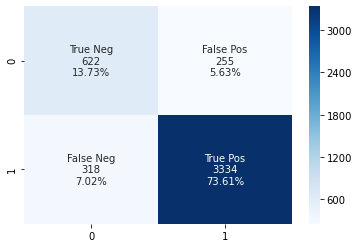

In [86]:
## Confusion matrix
cf_matrix1(y_test,y_test_pred)

In [87]:
## 2. Logistic Regression

In [88]:
lr=LogisticRegression() 
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Statistic: \n" ,cohen_kappa_score(y_test,y_test_pred))


Accuracy of train: 0.9325309187279152
AUC of train: 0.9688884198041823



Accuracy of test: 0.8801059836608522
AUC of test: 0.9067083093439374



Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.58      0.65       877
           1       0.90      0.95      0.93      3652

    accuracy                           0.88      4529
   macro avg       0.83      0.76      0.79      4529
weighted avg       0.87      0.88      0.87      4529

Cohen Kappa Statistic: 
 0.579460117961645


In [89]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(lr,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.899


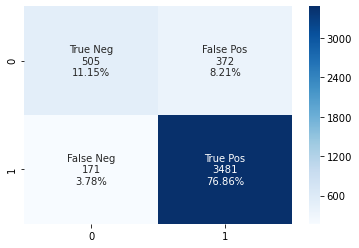

In [90]:
## Confusion Matrix
cf_matrix1(y_test,y_test_pred)

In [91]:
## 3. Decision Tree Classifier

In [92]:
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
y_train_pred=dtree.predict(X_train)
y_train_prob=dtree.predict_proba(X_train)[:,1]

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

y_test_pred=dtree.predict(X_test)
y_test_prob=dtree.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Statistic: \n" ,cohen_kappa_score(y_test,y_test_pred))


Accuracy of train: 1.0
AUC of train: 1.0



Accuracy of test: 0.8010598366085229
AUC of test: 0.6609022906178461



Classification report: 
               precision    recall  f1-score   support

           0       0.48      0.43      0.46       877
           1       0.87      0.89      0.88      3652

    accuracy                           0.80      4529
   macro avg       0.68      0.66      0.67      4529
weighted avg       0.79      0.80      0.80      4529

Cohen Kappa Statistic: 
 0.33561701489567775


In [93]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(dtree,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.657


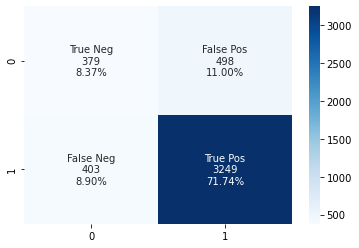

In [94]:
## Confusion Matrix
cf_matrix1(y_test,y_test_pred)

In [95]:
## Inference:-
## There is slight overfitting, so we can reduce it by applying Random Forest Classifier

In [96]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Statistic: \n" ,cohen_kappa_score(y_test,y_test_pred))


Accuracy of train: 1.0
AUC of train: 1.0



Accuracy of test: 0.8496356811658202
AUC of test: 0.8971583962053251



Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.28      0.42       877
           1       0.85      0.99      0.91      3652

    accuracy                           0.85      4529
   macro avg       0.84      0.63      0.67      4529
weighted avg       0.85      0.85      0.82      4529

Cohen Kappa Statistic: 
 0.3580410008839753


In [97]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(rf,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.892


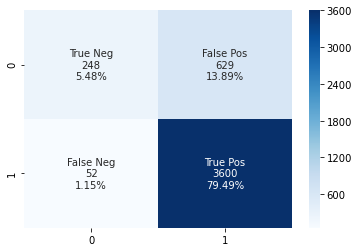

In [98]:
## Confusion Matrix

cf_matrix1(y_test,y_test_pred)

In [99]:
## Inference:-
## Overfitting has reduced slightly
## Let's tune its hyperparameters using GridSearch

In [100]:
from scipy.stats import randint as sp_randint
rf=RandomForestClassifier(random_state=1)
params={
    'n_estimators':sp_randint(50,250),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,20),
    'min_samples_split':sp_randint(2,20),
    'criterion':['gini','entropy'],
    'max_features':sp_randint(2,31)}

rsearch=RandomizedSearchCV(estimator=rf,param_distributions=params,cv=3,scoring='roc_auc',random_state=1)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [101]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 25,
 'min_samples_leaf': 10,
 'min_samples_split': 19,
 'n_estimators': 146}

In [102]:
rf=RandomForestClassifier(**rsearch.best_params_,random_state=1) 
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

print('\n'*2)
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))

Accuracy of train: 0.8219964664310954
AUC of train: 0.9142073574501022



Accuracy of test: 0.8063590196511371
AUC of test: 0.8999361184761852



Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       877
           1       0.81      1.00      0.89      3652

    accuracy                           0.81      4529
   macro avg       0.40      0.50      0.45      4529
weighted avg       0.65      0.81      0.72      4529



In [103]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(rf,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.897


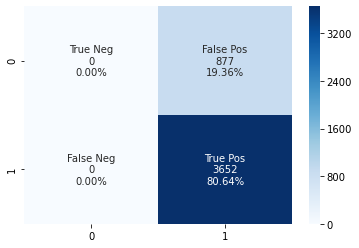

In [104]:
cf_matrix1(y_test,y_test_pred)

In [105]:
## Inference:
## Overfitting has reduced.
## Let's try boosting abd bagging algorithms

In [106]:
## AdaBoost Classifier

In [107]:
Adaboost=AdaBoostClassifier(random_state=0)
Adaboost.fit(X_train,y_train)
y_train_pred=Adaboost.predict(X_train)
y_train_prob=Adaboost.predict_proba(X_train)[:,1]


print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=Adaboost.predict(X_test)
y_test_prob=Adaboost.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Score: \n",cohen_kappa_score(y_test,y_test_pred))

Accuracy of train: 0.8684849823321554
AUC of train: 0.88361916411772



Accuracy of test: 0.8538308677412232
AUC of test: 0.8787766906747961



Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.44      0.54       877
           1       0.88      0.95      0.91      3652

    accuracy                           0.85      4529
   macro avg       0.79      0.70      0.72      4529
weighted avg       0.84      0.85      0.84      4529

Cohen Kappa Score: 
 0.45496802556936444


In [108]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(Adaboost,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.867


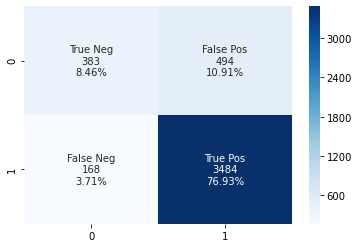

In [109]:
cf_matrix1(y_test,y_test_pred)

In [110]:
## Bagging Classifier

In [111]:
bagged=BaggingClassifier(random_state=0)
bagged.fit(X_train,y_train)
y_train_pred=bagged.predict(X_train)
y_train_prob=bagged.predict_proba(X_train)[:,1]


print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=bagged.predict(X_test)
y_test_prob=bagged.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Score: \n",cohen_kappa_score(y_test,y_test_pred))

Accuracy of train: 0.9923807420494699
AUC of train: 0.9994188409937291



Accuracy of test: 0.8410245087215721
AUC of test: 0.8195103415632052



Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53       877
           1       0.88      0.93      0.90      3652

    accuracy                           0.84      4529
   macro avg       0.75      0.70      0.72      4529
weighted avg       0.83      0.84      0.83      4529

Cohen Kappa Score: 
 0.43891676150314585


In [112]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(bagged,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.811


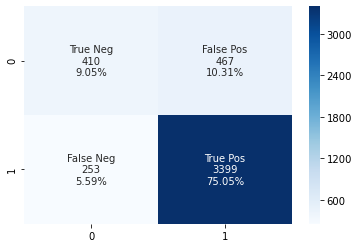

In [113]:
cf_matrix1(y_test,y_test_pred)

In [114]:
## Inference:-
## We can clearly note that Naive Bayes (BernoulliNB) is performing well among all the
## other classifiers as it generally works well with the text data.

In [115]:
## Gradient Boosting Classifier

In [116]:
clf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=50, max_depth=8, max_features='sqrt', subsample=0.8)
clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_train_prob=clf.predict_proba(X_train)[:,1]


print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=clf.predict(X_test)
y_test_prob=clf.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Score: \n",cohen_kappa_score(y_test,y_test_pred))

<IPython.core.display.Javascript object>

Accuracy of train: 0.8981338339222615
AUC of train: 0.9553750197504476



Accuracy of test: 0.8542724663281077
AUC of test: 0.9029781404044706



Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.36      0.49       877
           1       0.86      0.97      0.92      3652

    accuracy                           0.85      4529
   macro avg       0.81      0.67      0.70      4529
weighted avg       0.84      0.85      0.83      4529

Cohen Kappa Score: 
 0.41468692993882017


In [117]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(clf,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.902


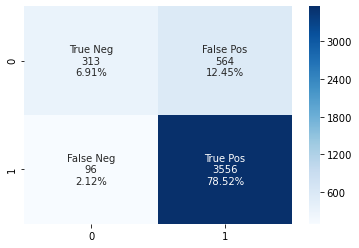

In [118]:
cf_matrix1(y_test,y_test_pred)

## TF-IDF

In [119]:
tv  = TV()
X_tv = tv.fit_transform(corpus).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)

In [120]:
## BernoulliNB

classifier1 = BernoulliNB()
classifier1.fit(X_train, y_train)

y_train_pred=classifier1.predict(X_train)
y_train_prob=classifier1.predict_proba(X_train)[:,1]

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

y_test_pred=classifier1.predict(X_test)
y_test_prob=classifier1.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Statistic: \n" ,cohen_kappa_score(y_test,y_test_pred))

Accuracy of train: 0.8982994699646644
AUC of train: 0.9416943867394327



Accuracy of test: 0.8679620225215279
AUC of test: 0.9132719329687362



Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       877
           1       0.91      0.93      0.92      3652

    accuracy                           0.87      4529
   macro avg       0.79      0.78      0.78      4529
weighted avg       0.86      0.87      0.87      4529

Cohen Kappa Statistic: 
 0.5662945833062436


In [121]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(classifier1,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.908


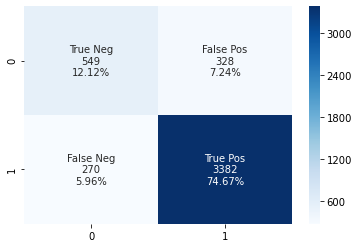

In [122]:
cf_matrix1(y_test,y_test_pred)

In [123]:
## Gradient Boosting Classifier

clf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=50, max_depth=8, max_features='sqrt', subsample=0.8)
clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_train_prob=clf.predict_proba(X_train)[:,1]


print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=clf.predict(X_test)
y_test_prob=clf.predict_proba(X_test)[:,1]

print('\n'*2)

print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))
print("Cohen Kappa Score: \n",cohen_kappa_score(y_test,y_test_pred))

<IPython.core.display.Javascript object>

Accuracy of train: 0.8899072438162544
AUC of train: 0.9656255437623252



Accuracy of test: 0.8480900861117244
AUC of test: 0.9038928076772728



Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.28      0.42       877
           1       0.85      0.98      0.91      3652

    accuracy                           0.85      4529
   macro avg       0.83      0.63      0.66      4529
weighted avg       0.84      0.85      0.82      4529

Cohen Kappa Score: 
 0.3518166886059434


In [126]:
roc_score=[]
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
score = cross_val_score(clf,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
print("ROC_AUC cross validation score is",round(np.mean(score),3))

ROC_AUC cross validation score is 0.901


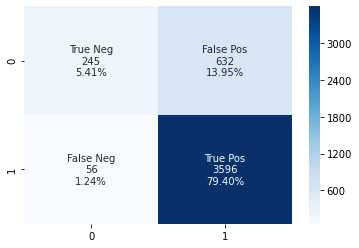

In [127]:
cf_matrix1(y_test,y_test_pred)

In [128]:
## Final Inference:
## We can clearly make conclusion that best ROC_AUC is 91.5 (Good score) and Cohen Kappa Score 0.605 (Substanial agreement 
## among the raters) when we applied CountVectorizer (BOW) with taking BernoulliNB as the algorithm.
## So, BernoulliNB is performing best here as it generally works well with the text data.

## END!